<a href="https://colab.research.google.com/github/chaimae0000/Projet-Octroi-des-credits/blob/main/Lending_Club1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # I-Présentation de la problématique : Octroie de Crédit


L’accès au crédit est un levier essentiel de développement économique, tant pour les particuliers que pour les entreprises. Toutefois, il représente également un risque majeur pour les institutions financières, qui doivent évaluer la capacité de remboursement des emprunteurs et anticiper les risques de défaut. Cette évaluation repose traditionnellement sur des règles fixes et des décisions humaines, pouvant conduire à des erreurs, à des biais ou à des refus injustifiés.

## Rôle du Machine Learning dans l’octroi des crédits

Machine Learning permet aujourd’hui d’automatiser, fiabiliser et personnaliser ce processus d’évaluation. En s’appuyant sur un grand volume de données clients historiques (revenu, historique de crédit, dettes, emploi, etc.), les algorithmes de ML peuvent prédire le risque de défaut d’un emprunteur avec une précision supérieure à celle des méthodes traditionnelles.

L'objectif du projet est de construire une application qui permet de prédire la solvabilité des clients potentiels et ainsi décider de l'octroi des crédits, en suivant les étapes suivantes :

- **EDA** : Analyse exploratoire des données d'anciens clients  
- **Data Preprocessing** : Prétraitement des données pour la préparation au modèle Machine Learning  
- **Application de 10 modèles de classification**  
- **Choix des 3 modèles les plus performants**  
- **Choix du modèle final**  
- **Déploiement du modèle via Streamlit (local)**  
- **Publication de l'application sur le cloud (Heroku)**


In [ ]:
#Cette commande importe automatiquement toutes les fonctions de matplotlib et numpy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import pickle
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score , f1_score ,roc_auc_score
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
pd.set_option("display.max_columns",None)
from sklearn.model_selection import learning_curve
import pickle
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# II-EDA :Exploratory Data Analysis

In [ ]:
biblio=pd.read_csv("LCDataDictionary.csv")


In [ ]:
biblio.head(4)

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades


In [ ]:
biblio.shape

(117, 2)

In [ ]:
df=pd.read_csv("lending_club_loans.csv", header=1, sep=',')

In [ ]:
df.head(4)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,NaN,Sep-2016,744.0,740.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2016,499.0,0.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,NaN,Sep-2016,719.0,715.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37

In [ ]:
df.shape

(42538, 115)

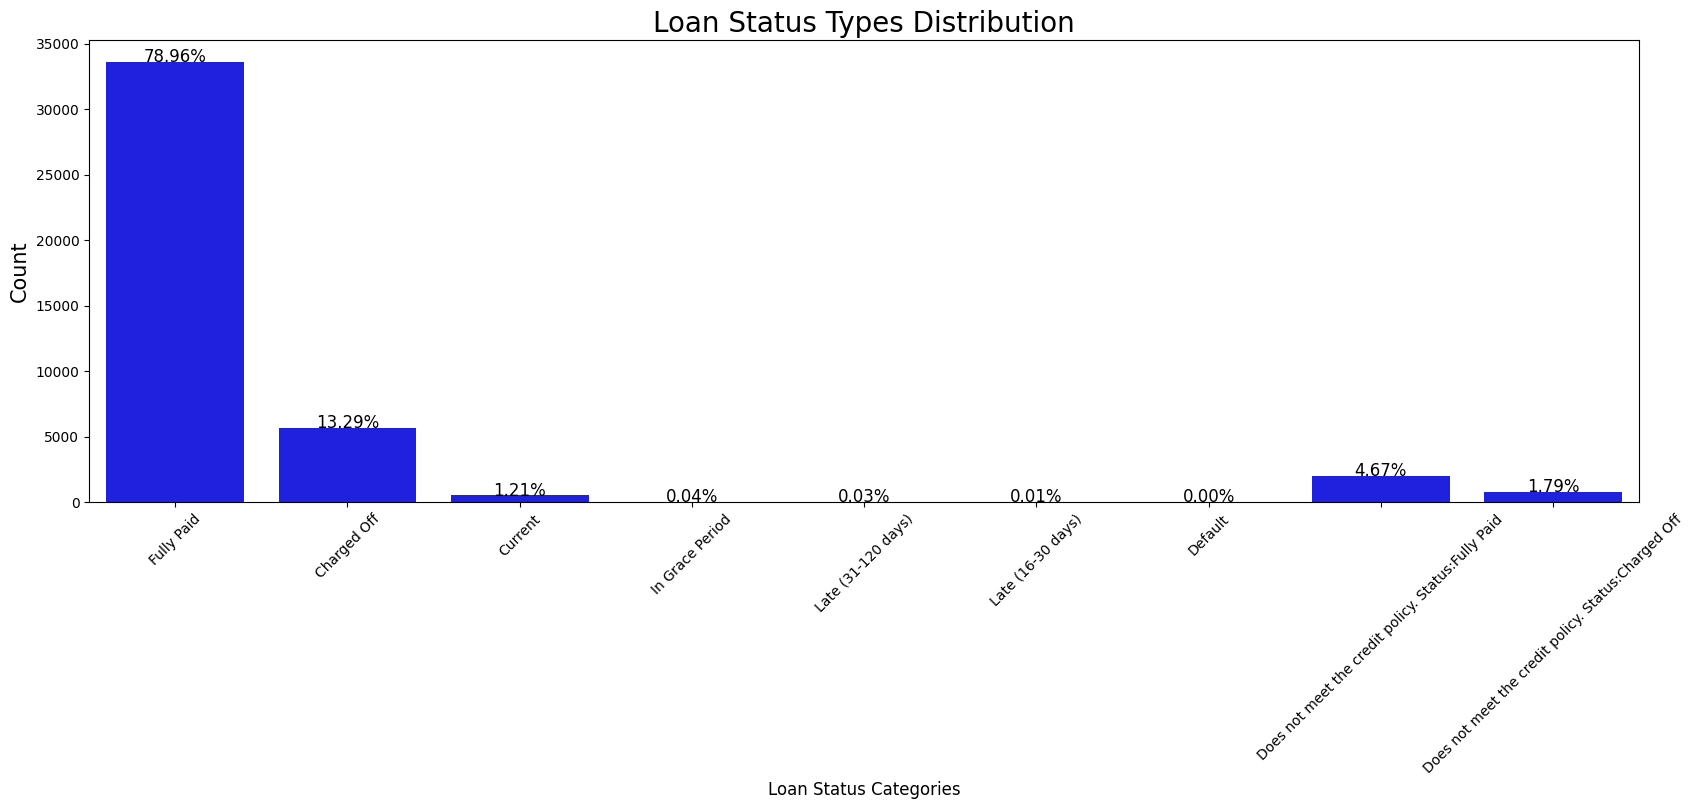

In [ ]:
#Calcule le nombre total de lignes dans le DataFrame df
total = len(df)

#crée une "feuille vide"
plt.figure(figsize = (20,6))

#Affiche un histogramme à barres "sns alias standard du bibliotheque Seaborn utilise"
g = sns.countplot(x="loan_status", data=df,
                  color='blue')
#Les étiquettes de l’axe X sont rotées à 45°.
g.set_xticklabels(g.get_xticklabels(),rotation=45)

#Personnalise les titres
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
#: Ajouter les pourcentages au-dessus de chaque barre

for p in g.patches:          #une liste de toutes les barres
    height = p.get_height()  #Récupère la hauteur de la barre = le nombre d’occurrences

    g.text(p.get_x()+p.get_width()/2.,   # Position horizontale du texte : centre de la barre
        height + 3,                      # Position verticale du texte : juste au-dessus de la barre
        '{:1.2f}%'.format(height / total * 100),  # Texte affiché : pourcentage formaté avec 2 décimales
        ha="center",                     # Alignement horizontal du texte (centered)
        fontsize=12                      # Taille du texte
          )

Pour notre variable Target   
Notre interêt portera surtout sur les valeurs : Fully Paid , Charged-off


Notre étude est un sujet de classification pour prédir si un crédit sera payé(fully paid) ou perdu(charged off) on procéde à la suppression des données qui concerne des crédit en cours (current)&(In grace periode).
ce qui sont en retard du crédit sont succeptibles de ne pas payer le crédit

In [ ]:

df["loan_status"].replace("Does not meet the credit policy. Status:Charged Off","Charged Off",inplace=True)
df["loan_status"].replace("Does not meet the credit policy. Status:Fully Paid","Fully Paid",inplace=True)
df["loan_status"].replace("Late (31-120 days)","Charged Off",inplace=True)
df["loan_status"].replace("Late (16-30 days)","Charged Off",inplace=True)
#Supprimer les lignes où loan_status == "Default" et "Current" et "In Grace Period"
df_l=df[(df["loan_status"]!="Current")&(df["loan_status"]!="In Grace Period")&(df["loan_status"]!="Default")]

<Axes: xlabel='count', ylabel='loan_status'>

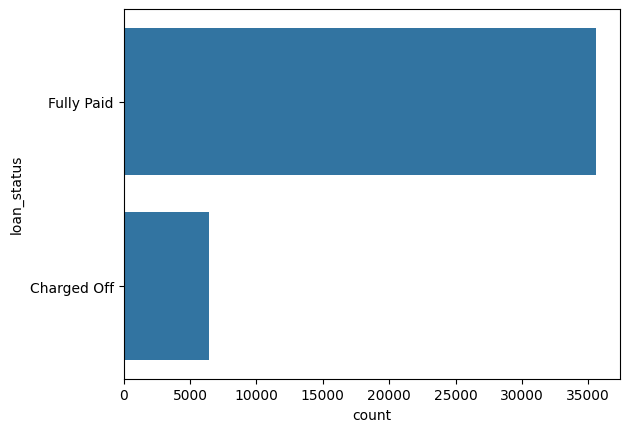

In [ ]:
sns.countplot(df_l.loan_status)

[Text(0, 0, 'credit_card'),
 Text(1, 0, 'car'),
 Text(2, 0, 'small_business'),
 Text(3, 0, 'other'),
 Text(4, 0, 'wedding'),
 Text(5, 0, 'debt_consolidation'),
 Text(6, 0, 'home_improvement'),
 Text(7, 0, 'major_purchase'),
 Text(8, 0, 'medical'),
 Text(9, 0, 'moving'),
 Text(10, 0, 'vacation'),
 Text(11, 0, 'house'),
 Text(12, 0, 'renewable_energy'),
 Text(13, 0, 'educational')]

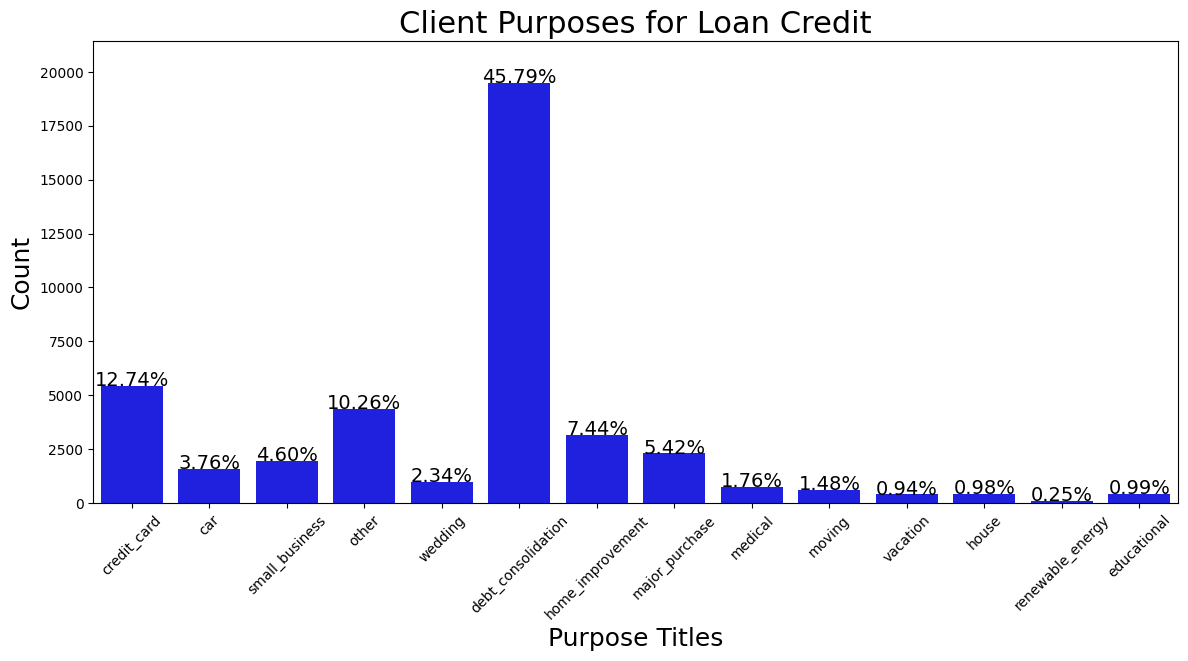

In [ ]:
plt.figure(figsize=(14,6))

g = sns.countplot(x='purpose', data=df_l ,
                  color='blue')
g.set_title("Client Purposes for Loan Credit", fontsize=22)
g.set_xlabel("Purpose Titles", fontsize=18)
g.set_ylabel('Count', fontsize=18)

sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14)

g.set_ylim(0, max(sizes) * 1.10)
g.set_xticklabels(g.get_xticklabels(),
                  rotation=45)

 Les Top 3 purposes sont :

- **45.5%** : Debt Consolidation  
- **12.74%** : Credit Card  
- **7.44%** : Home Improvement  

Les autres : **34.32%**

<Axes: xlabel='grade'>

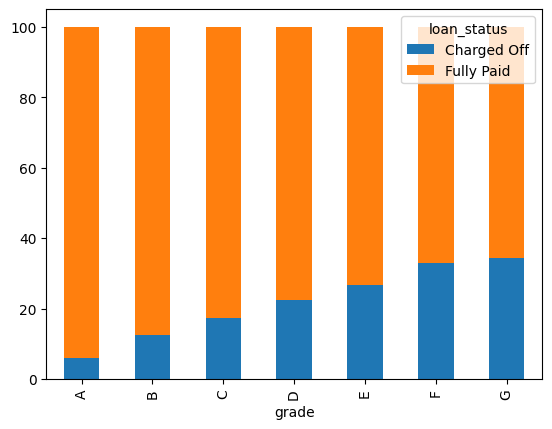

In [ ]:
#Groupe les lignes par grade et loan_status.Compter le nombre de clients.Réorganiser les données sous forme de tableau .
df_plot = df_l.groupby(['grade', 'loan_status']).size().reset_index().pivot(columns='loan_status', index='grade', values=0)
#reset_index():Convertit le résultat de groupby en DataFrame

df_plot['sum']=df_plot['Charged Off']+df_plot['Fully Paid']

df_plot['Charged Off']=df_plot['Charged Off']/df_plot['sum']*100

df_plot['Fully Paid']=df_plot['Fully Paid']/df_plot['sum']*100

df_plot.drop('sum',axis=1,inplace=True)
#Chaque barre montre la répartition totale, coupée en deux couleurs selon le statut du prêt 'stacked=True'.
df_plot.plot(kind="bar",stacked=True)

On remarque plus on diminue dans le grade , plus le risque de non solvabilité augmente



# III-Data Preprocessing :

##### 1-DATA Cleaning

<Axes: >

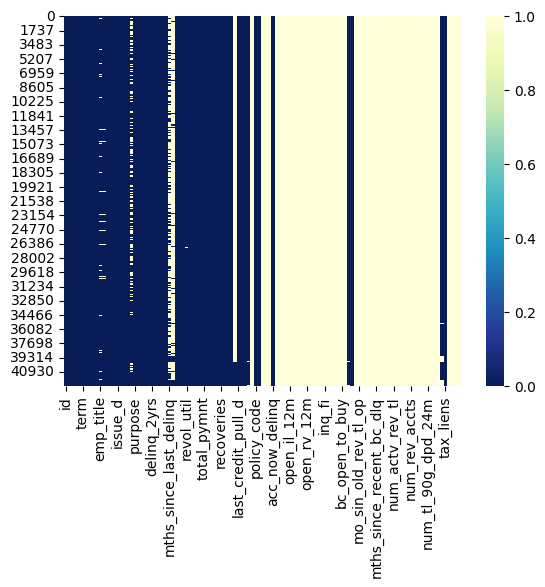

In [ ]:
#Affiche une carte de chaleur
# Visualiser les valeurs manquantes dans le DataFrame(NaN) :
sns.heatmap(df_l.isna(),cmap="YlGnBu_r")


In [ ]:
# Afficher le nombre de valeurs manquantes par colonne, trié par ordre décroissant
df_l.isna().sum().sort_values(ascending=False).reset_index()

,index,0
0,total_bal_ex_mort,42008
1,percent_bc_gt_75,42008
2,total_bc_limit,42008
3,num_op_rev_tl,42008
4,num_il_tl,42008
...,...,...
110,verification_status,3
111,last_fico_range_low,3
112,application_type,3
113,last_fico_range_high,3


In [ ]:
nb_null=df_l.isna().sum().sort_values(ascending=False).reset_index()
nb_null.columns=["cols","nb nul values"]
#Vérifie colonne par colonne si le nombre de NaN est égal au nombre total de lignes
nb_null[nb_null["nb nul values"]==len(df_l)]


,cols,nb nul values
0,total_bal_ex_mort,42008
1,percent_bc_gt_75,42008
2,total_bc_limit,42008
3,num_op_rev_tl,42008
4,num_il_tl,42008
5,num_bc_sats,42008
6,num_bc_tl,42008
7,num_actv_bc_tl,42008
8,num_accts_ever_120_pd,42008
9,mths_since_recent_revol_delinq,42008


In [ ]:
to_drop=nb_null[nb_null["nb nul values"]==len(df_l)]["cols"]
data1=df_l.drop(to_drop,axis=1)
data1.shape

(42008, 61)

<Axes: >

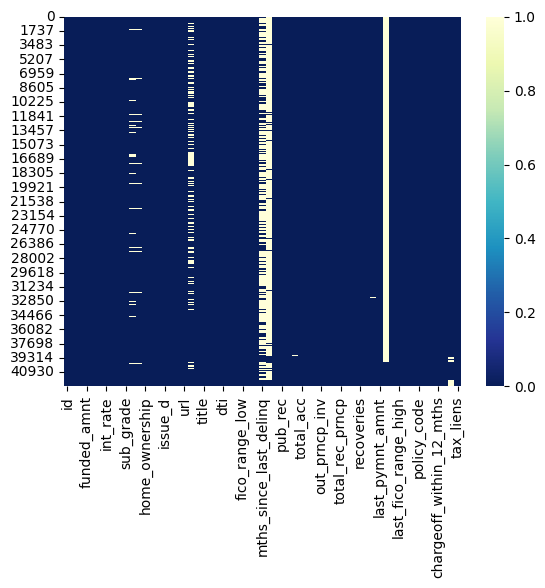

In [ ]:
sns.heatmap(data1.isna(),cmap="YlGnBu_r")

In [ ]:
nb_null=data1.isna().sum().sort_values(ascending=False).reset_index()
nb_null.columns=["cols","nb nul values"]
nb_null.head(10)

,cols,nb nul values
0,next_pymnt_d,39242
1,mths_since_last_record,38375
2,mths_since_last_delinq,26563
3,desc,13103
4,emp_title,2590
5,pub_rec_bankruptcies,1368
6,emp_length,1095
7,collections_12_mths_ex_med,148
8,chargeoff_within_12_mths,148
9,tax_liens,108


In [ ]:
# On supprime les données ayant + que 0.5% de données Null par colonnes :
to_drop=nb_null[nb_null["nb nul values"]>=0.005*len(data1)]["cols"]
data2=data1.drop(to_drop,axis=1)
data2.shape

NameError: name 'nb_null' is not defined

<Axes: >

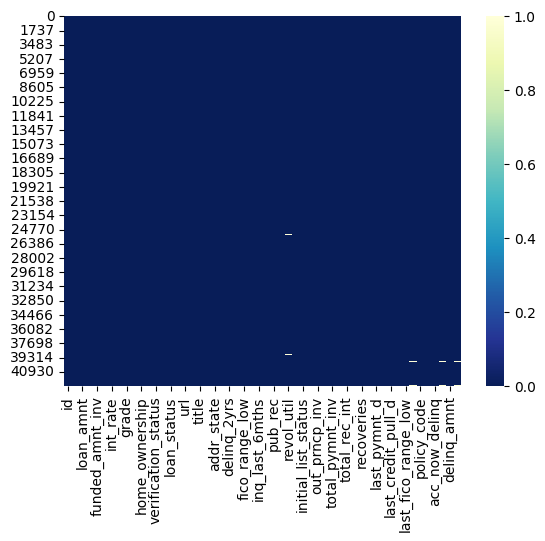

In [ ]:
sns.heatmap(data2.isna(),cmap="YlGnBu_r")


In [ ]:
nb_null=data2.isna().sum().sort_values(ascending=False).reset_index()
nb_null.columns=["cols","nb nul values"]
nb_null.head(10)

,cols,nb nul values
0,chargeoff_within_12_mths,148
1,collections_12_mths_ex_med,148
2,tax_liens,108
3,revol_util,93
4,last_pymnt_d,86
5,delinq_2yrs,32
6,earliest_cr_line,32
7,open_acc,32
8,inq_last_6mths,32
9,total_acc,32


In [ ]:
biblio[biblio["LoanStatNew"]=="chargeoff_within_12_mths"]


,LoanStatNew,Description
10,chargeoff_within_12_mths,Number of charge-offs within 12 months


In [ ]:
len(data2)


42008

In [ ]:
# Valeurs comprises dans la colonne chargeoff_within_12_mths
print("unique values")
print(data2["chargeoff_within_12_mths"].unique())
print("nb par valeurs")
print(data2["chargeoff_within_12_mths"].value_counts())

unique values
[ 0. nan]
nb par valeurs
chargeoff_within_12_mths
0.0    41860
Name: count, dtype: int64


In [ ]:
biblio[biblio["LoanStatNew"]=="collections_12_mths_ex_med"]


,LoanStatNew,Description
12,collections_12_mths_ex_med,Number of collections in 12 months excluding m...


In [ ]:
# Valeurs comprises dans la colonne chargeoff_within_12_med
print("unique values")
print(data2["collections_12_mths_ex_med"].unique())
print("nb par valeurs")
print(data2["collections_12_mths_ex_med"].value_counts())

unique values
[ 0. nan]
nb par valeurs
collections_12_mths_ex_med
0.0    41860
Name: count, dtype: int64


On remarque que pour les 2 colonnes , la majorité des valeurs sont 0 , si on remplie les autres colonnes avec 0 , ca ne donnera aucune information pour notre projet de classification.

In [ ]:
# Supprimer une colonne
data2=data2.drop("collections_12_mths_ex_med",axis=1)
data3=data2.drop("chargeoff_within_12_mths",axis=1)

In [ ]:
nb_null3=data3.isna().sum().sort_values(ascending=False).reset_index()
nb_null3.columns=["cols","nb nul values"]
nb_null3.head(10)

,cols,nb nul values
0,tax_liens,108
1,revol_util,93
2,last_pymnt_d,86
3,earliest_cr_line,32
4,delinq_2yrs,32
5,inq_last_6mths,32
6,total_acc,32
7,pub_rec,32
8,acc_now_delinq,32
9,open_acc,32


In [ ]:
biblio[biblio["LoanStatNew"]=="tax_liens"]


,LoanStatNew,Description
93,tax_liens,Number of tax liens


In [ ]:
data3["tax_liens"].value_counts()
data3=data3.drop("tax_liens",axis=1)

In [ ]:
biblio[biblio["LoanStatNew"]=="revol_util"]

,LoanStatNew,Description
91,revol_util,"Revolving line utilization rate, or the amount..."


In [ ]:
data3["revol_util"].value_counts()


,count
revol_util,
0%,1062
40.7%,65
0.2%,64
63%,63
0.1%,61
...,...
33.29%,1
6.75%,1
36.94%,1


In [ ]:
# Enlever le symbole % et convertir en float
data3["revol_util"] = data3["revol_util"].str.replace('%', '')
data3["revol_util"] = pd.to_numeric(data3["revol_util"], errors='coerce')

# Imputation des valeurs manquantes de 'revol_util' par la médiane
revol_median = data3["revol_util"].median()
data3["revol_util"] = data3["revol_util"].fillna(revol_median)


In [ ]:
nb_null=data3.isna().sum().sort_values(ascending=False).reset_index()
nb_null.columns=["cols","nb nul values"]
nb_null.head(10)

,cols,nb nul values
0,last_pymnt_d,86
1,delinq_2yrs,32
2,inq_last_6mths,32
3,open_acc,32
4,acc_now_delinq,32
5,total_acc,32
6,pub_rec,32
7,earliest_cr_line,32
8,delinq_amnt,32
9,title,16


In [ ]:
biblio[biblio["LoanStatNew"]=="last_pymnt_d"]


,LoanStatNew,Description
40,last_pymnt_d,Last month payment was received


In [ ]:
data3["last_pymnt_d"].value_counts()


,count
last_pymnt_d,
Mar-2013,1070
Dec-2014,949
May-2013,943
Feb-2013,906
Mar-2012,893
...,...
Jun-2008,20
Mar-2008,18
Jan-2008,11


In [ ]:
# Vérifier combien de clients "Fully Paid" n'ont pas de date de dernier paiement (last_pymnt_d)
data3[data3["loan_status"]=='Fully Paid']["last_pymnt_d"].isnull().sum()

np.int64(0)

In [ ]:
data3[data3["last_pymnt_d"].isnull()]["loan_status"].unique()


array(['Charged Off', nan], dtype=object)

Toutes les valeurs NULL de la colonne #last_pymnt_d sont dans les crédit non payés , on remplace donc les valeurs NULL de last_pymnt_d par les dates les plus récurentes parmi les crédits non payés

In [ ]:
data3[(data3["loan_status"]=='Charged Off')]["last_pymnt_d"].value_counts().reset_index()


,last_pymnt_d,count
0,Oct-2012,180
1,Jul-2012,171
2,Jun-2012,161
3,Feb-2012,160
4,Aug-2012,157
...,...,...
101,Jul-2016,4
102,Jan-2008,3
103,May-2016,3
104,Jun-2016,2


In [ ]:
d1=data3[(data3["loan_status"]=='Charged Off')]
value=d1["last_pymnt_d"].value_counts().index[0]
print(value)

Oct-2012


In [ ]:
data3["last_pymnt_d"]=data3["last_pymnt_d"].fillna(value)


In [ ]:
nb_null=data3.isna().sum().sort_values(ascending=False).reset_index()
nb_null.columns=["cols","nb nul values"]
nb_null.head(10)

,cols,nb nul values
0,inq_last_6mths,32
1,earliest_cr_line,32
2,delinq_2yrs,32
3,delinq_amnt,32
4,acc_now_delinq,32
5,total_acc,32
6,pub_rec,32
7,open_acc,32
8,title,16
9,annual_inc,7


In [ ]:
# Supprimer toutes les lignes contenant au moins une valeur manquante

data4=data3.dropna()


<Axes: >

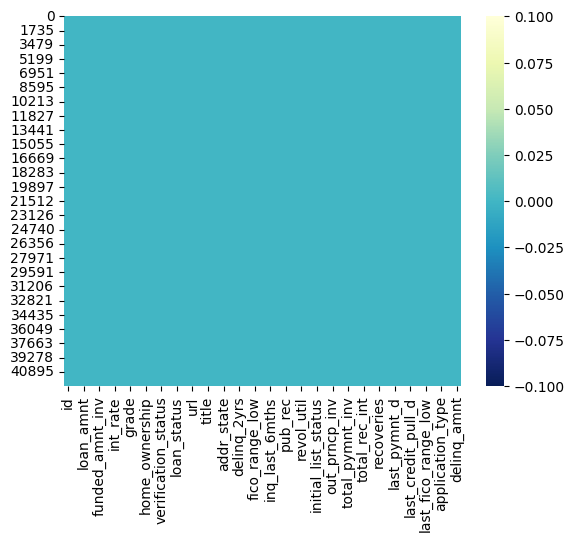

In [ ]:
sns.heatmap(data4.isna(),cmap="YlGnBu_r")

Ce graphique confirme qu’il n’y a plus aucune valeur manquante dans le dataset.
Aucune cellule n’est colorée, ce qui signifie que toutes les colonnes et toutes les lignes sont désormais complètes après nettoyage.

In [ ]:
biblio[biblio["LoanStatNew"]=="url"]

,LoanStatNew,Description
111,url,URL for the LC page with listing data.


#### 2-Data Preprocessing


In [ ]:
data4["policy_code"].value_counts()

,count
policy_code,
1.0,41960


In [ ]:
data_nz=data4.drop("policy_code",axis=1)

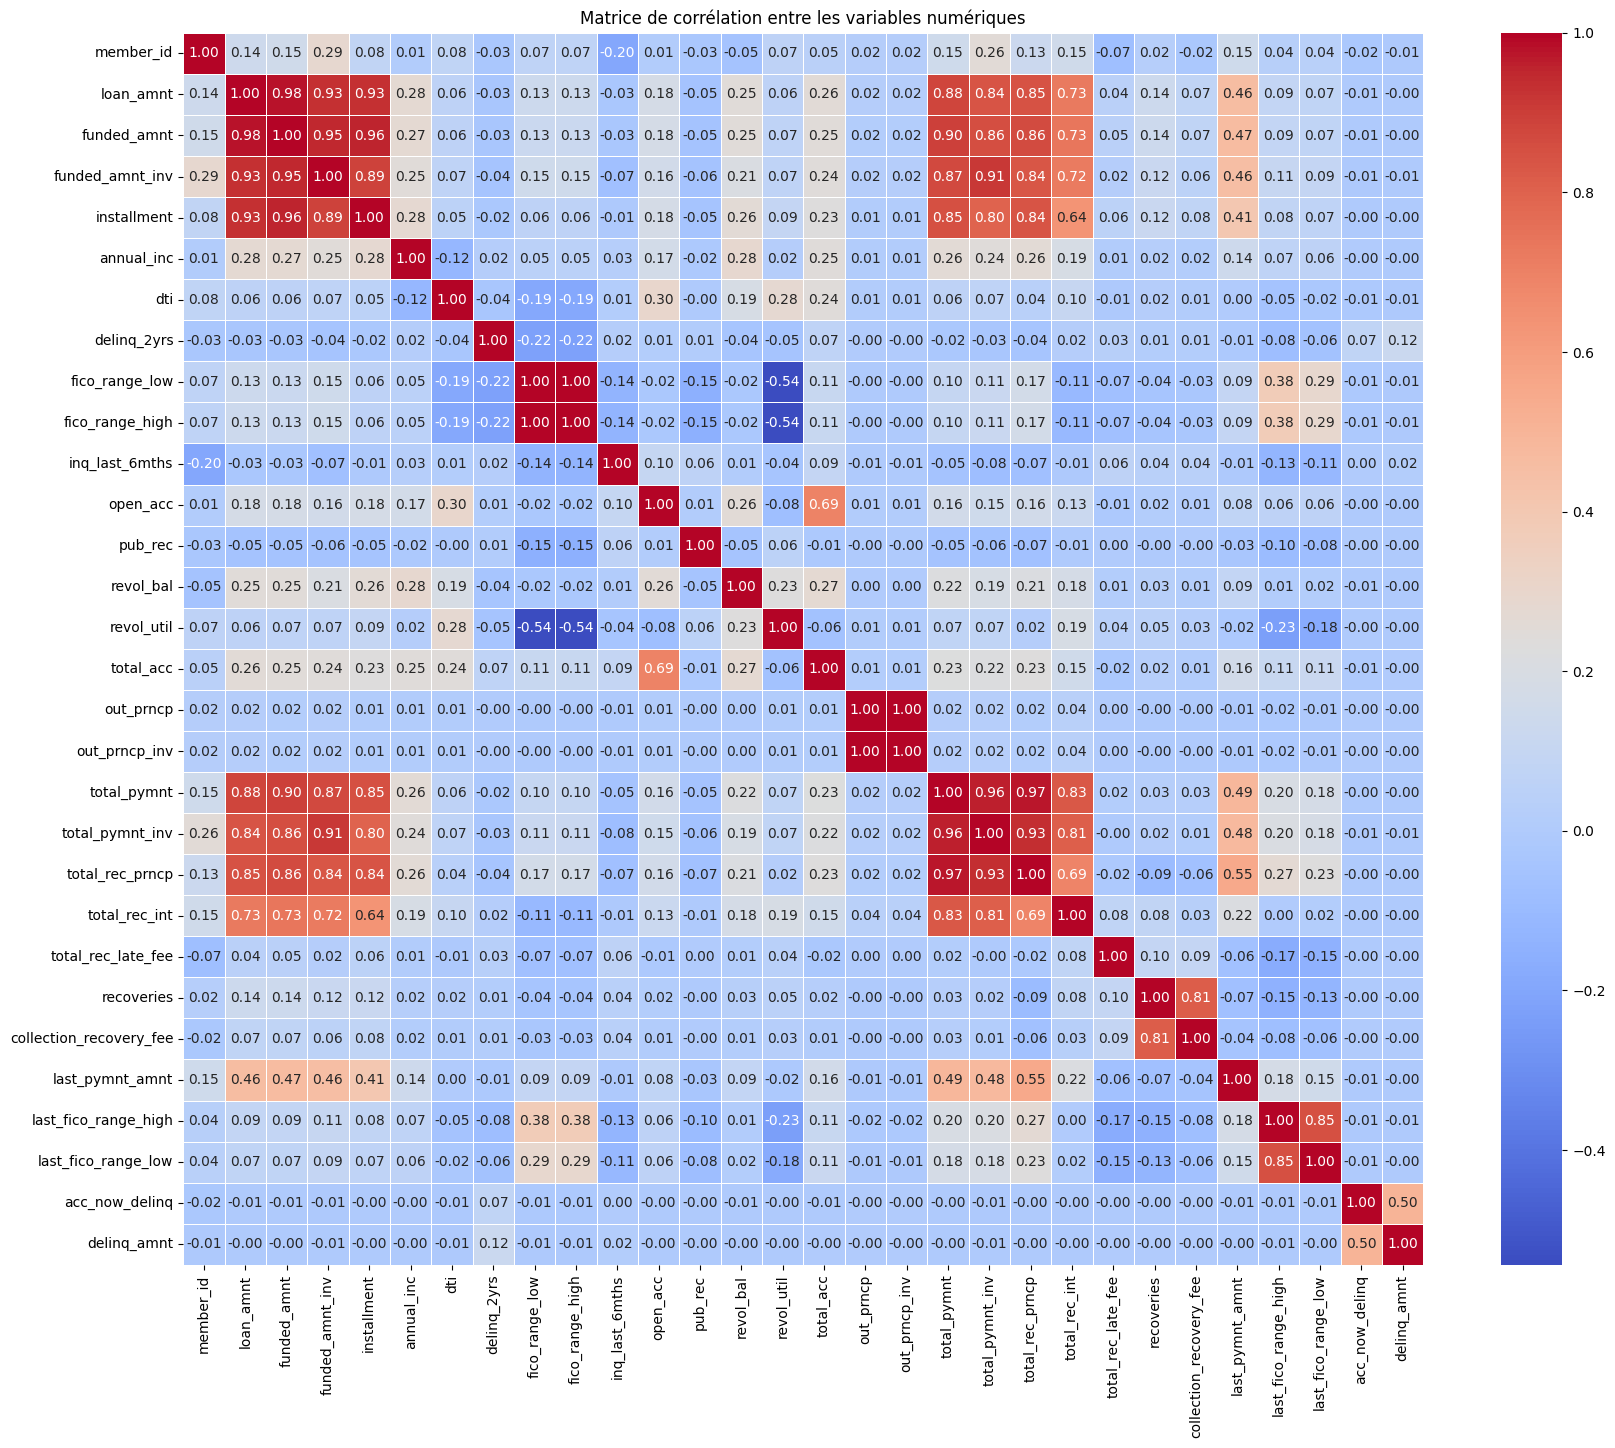

In [ ]:
corr_matrix = data_nz.select_dtypes(include=[np.number]).corr()


# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation entre les variables numériques")
plt.show()

In [ ]:
data_nz.shape

(41960, 50)

 la colonne id et url ne fournira aucune info pour nos futures modeles

In [ ]:
data_nd=data_nz.drop(["id","url"] ,axis=1)

In [ ]:
# Title  n'est pas important , on va utiliser la variable purpose
data_nd.drop(["title"], axis=1, inplace=True)

In [ ]:
data_nd.dtypes

,0
member_id,float64
loan_amnt,float64
funded_amnt,float64
funded_amnt_inv,float64
term,object
int_rate,object
installment,float64
grade,object
sub_grade,object
home_ownership,object


In [ ]:
# on a pas besoin de l'id du membre'
data_nd.drop(["member_id"], axis=1, inplace=True)

In [ ]:
data_nd["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
data_nd["term"] = data_nd["term"].str.replace(" months", "")
data_nd["term"] = data_nd["term"].astype("int")

In [ ]:
data_nd["term"]

,term
0,36
1,60
2,36
3,36
5,36
...,...
42509,36
42511,36
42512,36
42513,36


In [ ]:
biblio[biblio["LoanStatNew"]=="int_rate"]

,LoanStatNew,Description
34,int_rate,Interest Rate on the loan


In [ ]:
data_nd["int_rate"]

,int_rate
0,10.65%
1,15.27%
2,15.96%
3,13.49%
5,7.90%
...,...
42509,13.12%
42511,14.70%
42512,7.12%
42513,10.59%


In [ ]:
# Suppression du symbole '%' dans la colonne 'int_rate' et conversion en float
data_nd["int_rate"] = data_nd["int_rate"].str.replace('%', '')
data_nd["int_rate"] = pd.to_numeric(data_nd["int_rate"], errors='coerce')


In [ ]:
# 100% corrélés fico_range_high et 'fico_range_low'
data_nd[['fico_range_high','fico_range_low']].corr()

,fico_range_high,fico_range_low
fico_range_high,1.0,1.0
fico_range_low,1.0,1.0


In [ ]:
data_nd.drop(['fico_range_low'], axis=1, inplace=True)

In [ ]:
data_nd[['last_fico_range_high','last_fico_range_low']].corr()


,last_fico_range_high,last_fico_range_low
last_fico_range_high,1.000000,0.850836
last_fico_range_low,0.850836,1.000000


In [ ]:
data_nd.drop(['last_fico_range_low'], axis=1, inplace=True)


In [ ]:
# la colonne subgrade contient la doonée de grade , on supprime grade .
data_nd.drop(["grade"], axis=1, inplace=True)

on a les  données  address state and zip code on supprime  ces colonnes concernent la position géographique de la personne car il n'influence pas la solvabilité du client


In [ ]:
data_nd.drop(["addr_state"], axis=1, inplace=True)
data_nd.drop(["zip_code"], axis=1, inplace=True)



In [ ]:
data_nd.dtypes[data_nd.dtypes == 'object']


,0
sub_grade,object
home_ownership,object
verification_status,object
issue_d,object
loan_status,object
pymnt_plan,object
purpose,object
earliest_cr_line,object
initial_list_status,object
last_pymnt_d,object


In [ ]:
data_nd["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
data_S=data_nd
#LabelEncoder va donner un code numérique unique à chaque catégorie
le = LabelEncoder()
data_S["home_ownership"] = le.fit_transform(data_S["home_ownership"])
pickle.dump(le, open("encoder_home_ownership.pkl", "wb"))


In [ ]:
data_S["sub_grade"] = le.fit_transform(data_S["sub_grade"])
pickle.dump(le, open("encoder_sub_grade.pkl", "wb"))
data_S["verification_status"].unique()
data_S["verification_status"] = le.fit_transform(data_S["verification_status"])
pickle.dump(le, open("encoder_verification_status.pkl", "wb"))


In [ ]:
data_S["pymnt_plan"].unique()


array(['n', 'y'], dtype=object)

In [ ]:
data_S["pymnt_plan"] = data_S["pymnt_plan"].map({"y": 1, "n": 0})


In [ ]:
biblio[biblio["LoanStatNew"]=="earliest_cr_line"]

,LoanStatNew,Description
18,earliest_cr_line,The month the borrower's earliest reported cre...


On Procède à la suppression des colonnes dates¶


In [ ]:
dates_cols=["issue_d","last_credit_pull_d","last_pymnt_d","earliest_cr_line"]
data_S.drop(dates_cols,axis=1,inplace=True)

In [ ]:
data_S["loan_status"].unique()


array(['Fully Paid', 'Charged Off'], dtype=object)

In [ ]:
data_S["loan_status"] = data_S["loan_status"].map({"Fully Paid": 1, "Charged Off": 0})


In [ ]:
data_S["purpose"].unique()


array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [ ]:
data_S["purpose"] = le.fit_transform(data_S["purpose"])
pickle.dump(le, open("encoder_purpose.pkl", "wb"))


In [ ]:
data_S["initial_list_status"].unique()


array(['f'], dtype=object)

In [ ]:
data_S.drop(["initial_list_status"], axis=1, inplace=True)

In [ ]:
data_S["application_type"].unique()


array(['INDIVIDUAL'], dtype=object)

In [ ]:
data_S.drop(["application_type"], axis=1, inplace=True)

<Axes: ylabel='count'>

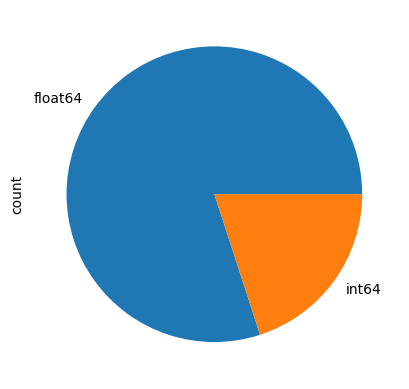

In [ ]:
data_S.dtypes.value_counts().plot.pie()


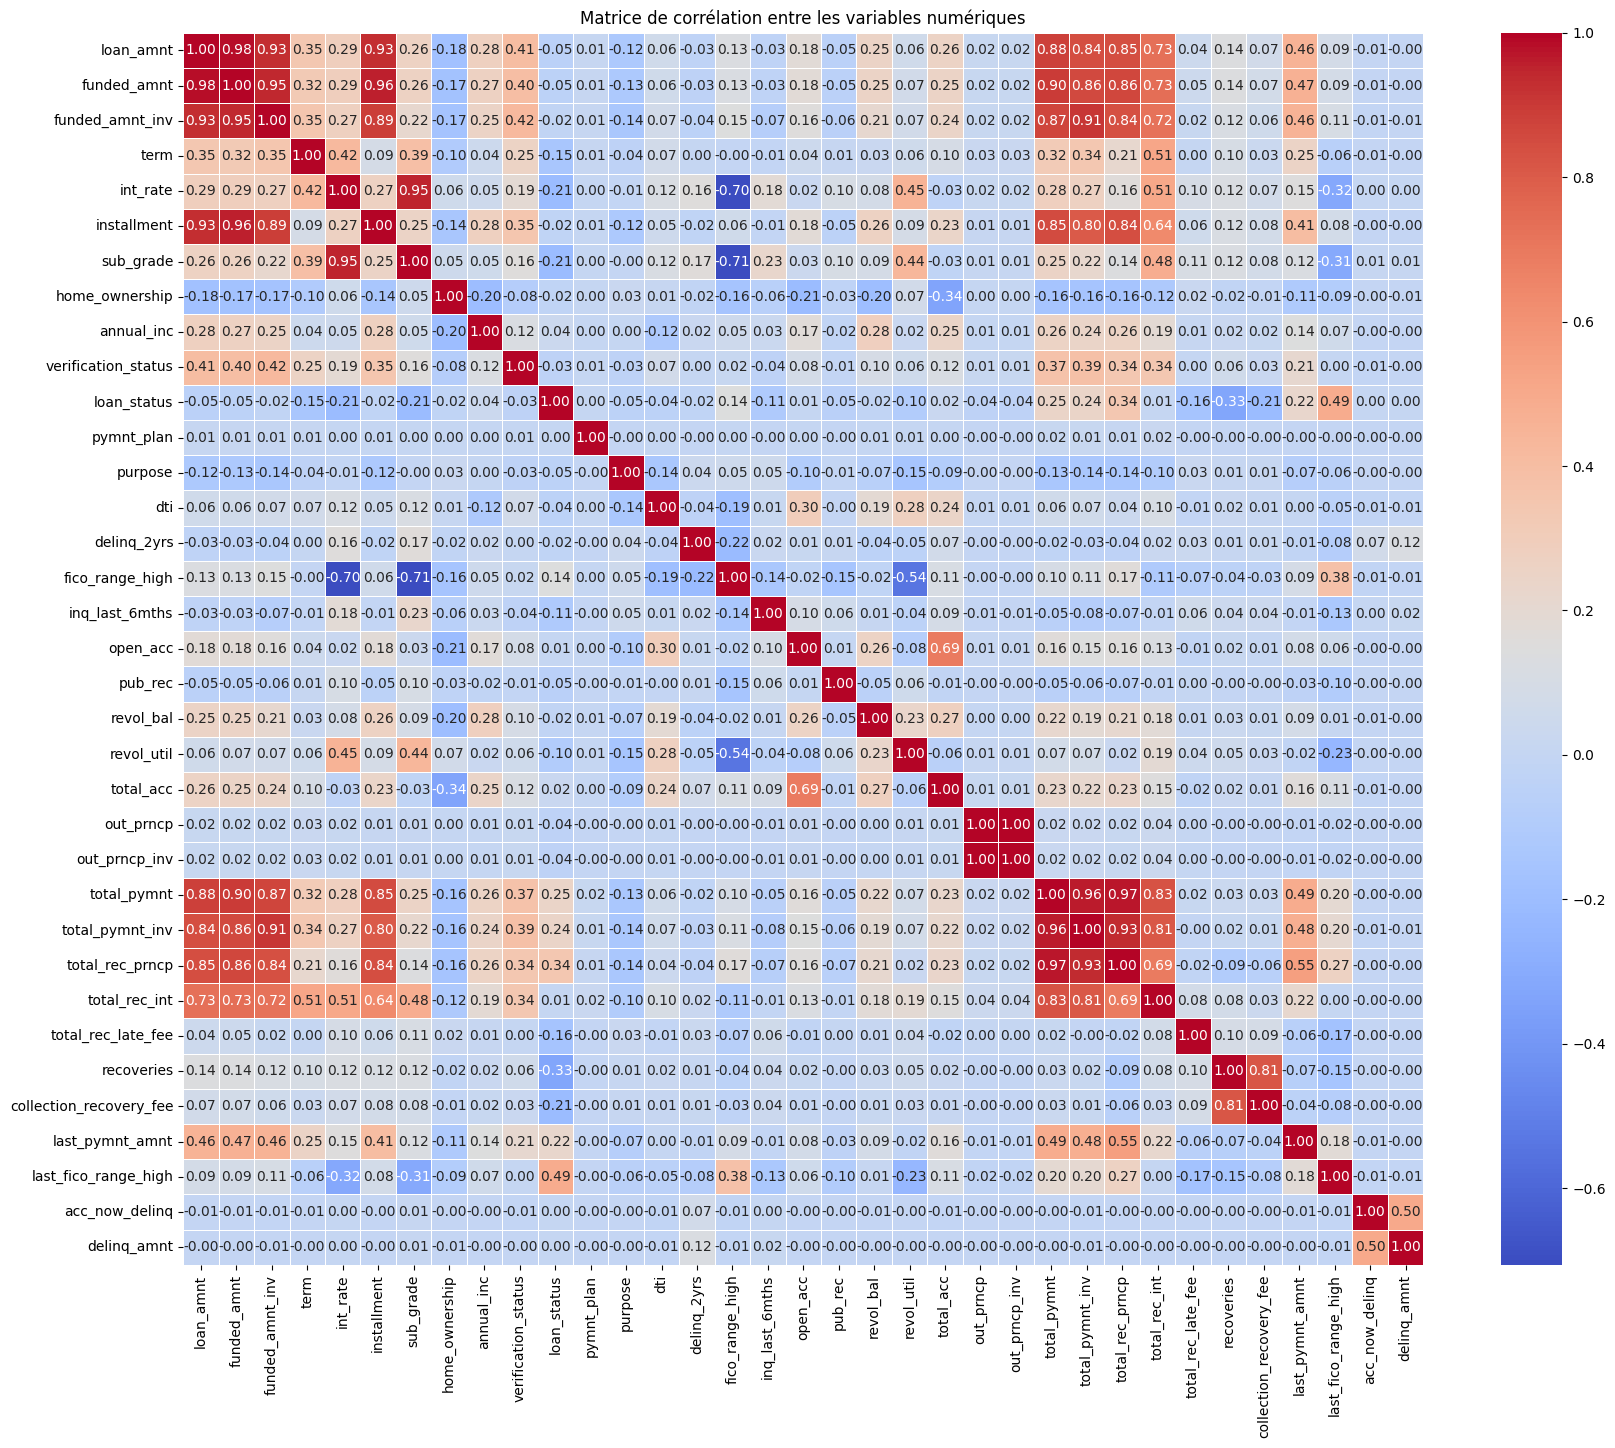

In [ ]:
corr_matrix = data_S.select_dtypes(include=[np.number]).corr()


# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation entre les variables numériques")
plt.show()

In [ ]:
data_S[['loan_amnt','funded_amnt_inv']].corr()

,loan_amnt,funded_amnt_inv
loan_amnt,1.00000,0.92783
funded_amnt_inv,0.92783,1.00000


In [ ]:
data_f=data_S

In [ ]:
data_f.drop(["funded_amnt_inv"], axis=1, inplace=True)


In [ ]:
data_f.drop(["funded_amnt"], axis=1, inplace=True)


In [ ]:
data_f.drop(["total_pymnt_inv"], axis=1, inplace=True)


In [ ]:
data_f[['out_prncp_inv','out_prncp']].corr()

,out_prncp_inv,out_prncp
out_prncp_inv,1.000000,0.999989
out_prncp,0.999989,1.000000


In [ ]:
data_f.drop(["out_prncp_inv"], axis=1, inplace=True)


<Axes: >

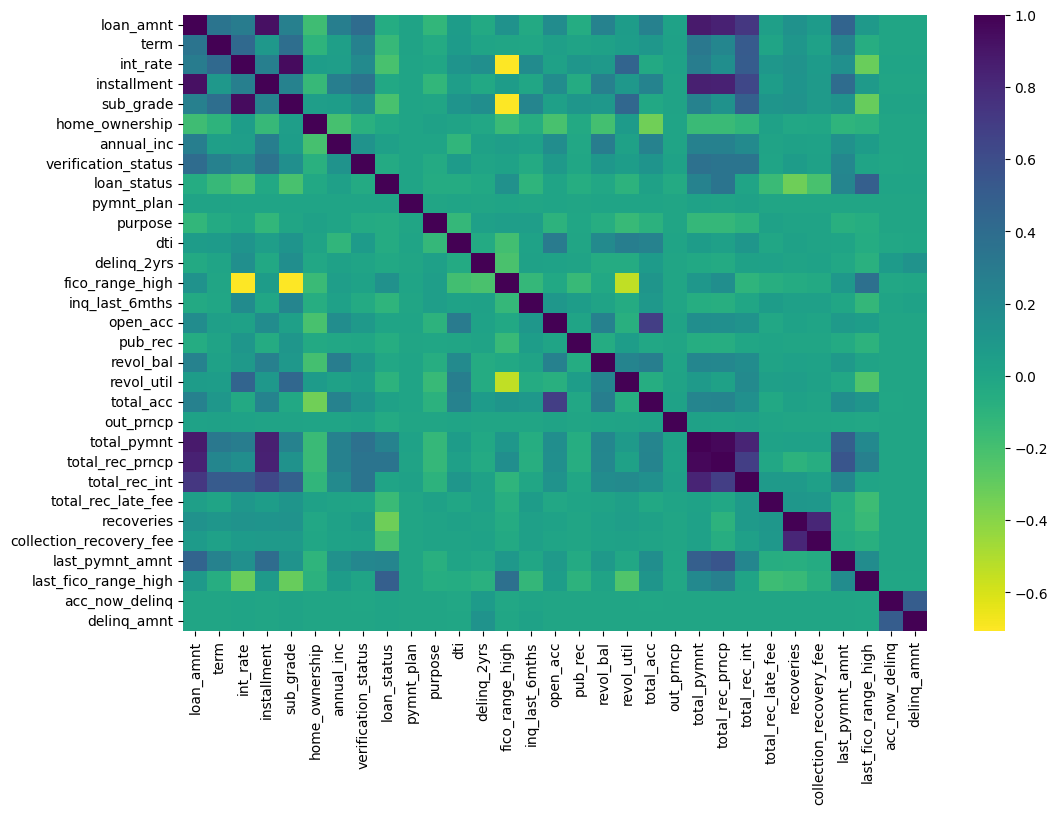

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data_f.corr(),cmap="viridis_r")

### Conclusions tirées de l’EDA (Exploratory Data Analysis)


**Structure des données :**

Le dataset contient des informations détaillées sur les prêts accordés, les profils emprunteurs, leur solvabilité (loan_status), ainsi que diverses variables financières et comportementales.

**Nettoyage des données :**

-Plusieurs colonnes contenaient des valeurs manquantes (NaN).

-Ces valeurs ont été imputées ou les colonnes supprimées selon leur utilité.

-Des colonnes entièrement vides ou peu informatives (comme chargeoff_within_12_mths) ont été supprimées.

**Colonnes textuelles nettoyées :**

-Des colonnes comme term ou verification_status ont été transformées en variables numériques pour la modélisation.

-Les colonnes de type date ont été soit supprimées.

**Analyse de la cible (loan_status) :**

-Seules deux catégories ont été conservées : Fully Paid (0) et Charged Off (1), pour un modèle binaire.

**Corrélations observées :**

-Les variables hautement corrélées entre elles ont été supprimées pour éviter la redondance.

**Variables catégorielles importantes :**

Le grade et purpose ont un lien clair avec le taux de défaut. Par exemple, les grades D, E, F présentent plus de défauts (Charged Off).


# IV- Application de 10 Modèles de classification sur notre data

In [ ]:
data_f.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,acc_now_delinq,delinq_amnt
0,5000.0,36,10.65,162.87,6,4,24000.0,2,1,0,1,27.65,0.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,5863.155187,5000.00,863.16,0.00,0.00,0.00,171.62,744.0,0.0,0.0
1,2500.0,60,15.27,59.83,13,4,30000.0,1,0,0,0,1.00,0.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,1008.710000,456.46,435.17,0.00,117.08,1.11,119.66,499.0,0.0,0.0
2,2400.0,36,15.96,84.33,14,4,12252.0,0,1,0,11,8.72,0.0,739.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,3005.666844,2400.00,605.67,0.00,0.00,0.00,649.91,719.0,0.0,0.0
3,10000.0,36,13.49,339.31,10,4,49200.0,1,1,0,9,20.00,0.0,694.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,12231.890000,10000.00,2214.92,16.97,0.00,0.00,357.48,604.0,0.0,0.0
5,5000.0,36,7.90,156.46,3,4,36000.0,1,1,0,13,11.20,0.0,734.0,3.0,9.0,0.0,7963.0,28.3,12.0,0.0,5632.210000,5000.00,632.21,0.00,0.00,0.00,161.03,679.0,0.0,0.0


In [ ]:
drop_cols = ["pymnt_plan","out_prncp","acc_now_delinq","delinq_amnt"]
data_f.drop(drop_cols, axis=1, inplace=True)
data_f.drop(["installment"], axis=1, inplace=True)


In [ ]:
X=data_f.drop("loan_status",axis=1)
y=data_f["loan_status"]

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
"""Cette méthode permet de diviser un jeu de données en train et test
en préservant les proportions des classes cibles (y) dans les deux ensembles"""
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state=42)
for train , test in sss.split(X,y):
    X_train,X_test=X.iloc[train],X.iloc[test]  #On utilise .iloc[] pour sélectionner les lignes par position
    y_train,y_test=y.iloc[train],y.iloc[test]

In [ ]:
import pickle
from sklearn.preprocessing import MinMaxScaler
#scaler transforme les valeurs numériques pour qu’elles soient entre 0 et 1
scaler=MinMaxScaler()
#Apprentissage des bornes min et max
scaler.fit(X_train)
#Transformation des données d’entraînement
X_train=scaler.transform(X_train)
#Transformation des données de test
X_test=scaler.transform(X_test)
# Sauvegarde du modèle scaler pour Usage sur Streamlit
pickle.dump(scaler,open("scaler.pkl","wb"))

### Choix du Modèle  :

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score


In [ ]:
#stocker plusieurs modèles dans une seule variable pour les tester facilement
models={'1-LogisticRegression':LogisticRegression(random_state=42),
        '2-KNeighborsClassifier':KNeighborsClassifier(),
        '3-DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42),
        "4-Support Vector Machine" : SVC(gamma='scale') ,
        "5-Naive Bayes (Gaussian)" : GaussianNB() ,
        "6-Naive Bayes (Multinomial)" : MultinomialNB() ,
        "7-Stochastic Gradient Descent Classifier" : SGDClassifier(max_iter=1000, tol=1e-3, random_state=42),
        "8-Random Forest": RandomForestClassifier(n_estimators=100, random_state=42) ,
        "9-Gradient Boosting Classifier" :  GradientBoostingClassifier() ,
        "10-Adaptive Boosting Classifier " : AdaBoostClassifier()
       }

In [ ]:

# Définition d’une fonction de score
def f1_sc(y_true,y_pred):
    #fonction de Scikit-learn qui calcule le F1-score (moyenne harmonique entre précision et rappel).
    sc=f1_score(y_test,y_pred)
    print(f'La precision du Modèle est :{round(sc,4)}')  #arrondit le score à 4 chiffres après la virgule


In [ ]:

# Run the models (train , test , evaluate):

#boucle sur chaque couple (nom du modèle, instance) dans mon dictionnaire.
def train_test_eval(models,X_train,y_train,X_test, y_test):
    for name , model in models.items() :
        print(name,':')
        #entraîne le modèle avec les données d’entraînement
        model.fit(X_train,y_train)
        #fait des prédictions sur le jeu de test
        f1_sc(y_test,model.predict(X_test)) # calcule et affiche le score F1 entre les vraies valeurs (y_test) et les prédict*
        print('-'*30)

In [ ]:
train_test_eval(models,X_train,y_train,X_test, y_test)


1-LogisticRegression :
La precision du Modèle est :0.9816
------------------------------
2-KNeighborsClassifier :
La precision du Modèle est :0.9494
------------------------------
3-DecisionTreeClassifier :
La precision du Modèle est :0.9765
------------------------------
4-Support Vector Machine :
La precision du Modèle est :0.9854
------------------------------
5-Naive Bayes (Gaussian) :
La precision du Modèle est :0.9747
------------------------------
6-Naive Bayes (Multinomial) :
La precision du Modèle est :0.9201
------------------------------
7-Stochastic Gradient Descent Classifier :
La precision du Modèle est :0.9841
------------------------------
8-Random Forest :
La precision du Modèle est :0.9946
------------------------------
9-Gradient Boosting Classifier :
La precision du Modèle est :0.9952
------------------------------
10-Adaptive Boosting Classifier  :
La precision du Modèle est :0.9939
------------------------------


D'aprés le choix du F1 Score : les Top 3 modèles sont :
- Random Forest : 99,57 %
- Gradient Boosting Classifier : 99,64 %
-Adaptive Boosting Classifier : 99,59 %

# V- choix de 3 Modèles les plus Performants

### Gradient Boosting Classifier

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

             Révèle quoi ?        utiliser quand
**Precision**	Qualité des positifs prédits->	        Faux positifs sont à éviter. TP / (TP + FP)

**Recall**	Quantité de vrais positifs trouvés->
Faux négatifs sont critiques (ex. détection fraude).TP / (TP + FP)

**F1-Score**	Compromis entre Précision et Rappel->Classes déséquilibrées, besoin d’équilibre.

2 × (Precision × Recall) / (Precision + Recall)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

f1 = round(f1_score(y_test, y_pred), 4) * 100
precision = round(precision_score(y_test, y_pred), 4) * 100
recall = round(recall_score(y_test, y_pred), 4) * 100

print(f"Random Forest → precision: {precision}%, \n F1 Score: {f1}%,\n recall: {recall}%")


Random Forest → precision: 99.00999999999999%, 
 F1 Score: 99.46000000000001%,
 recall: 99.92%


In [ ]:
gbc = GradientBoostingClassifier(random_state=42)

gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)


f1 = round(f1_score(y_test, y_pred), 4) * 100
precision = round(precision_score(y_test, y_pred), 4) * 100
recall = round(recall_score(y_test, y_pred), 4) * 100

print(f"Gradient Boosting Classifier → precision: {precision}%, \n F1 Score: {f1}%,\n recall: {recall}%")

Gradient Boosting Classifier → precision: 99.15%, 
 F1 Score: 99.52%,
 recall: 99.9%


In [ ]:

abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)

f1 = round(f1_score(y_test, y_pred), 4) * 100
precision = round(precision_score(y_test, y_pred), 4) * 100
recall = round(recall_score(y_test, y_pred), 4) * 100

print(f"Adaptive Boosting Classifier  → precision: {precision}%, \n F1 Score: {f1}%,\n recall: {recall}%")


Adaptive Boosting Classifier  → precision: 98.98%, 
 F1 Score: 99.39%,
 recall: 99.81%


Conclusion :

Le Meilleure Modèle est le : Gradient Boosting Classifier

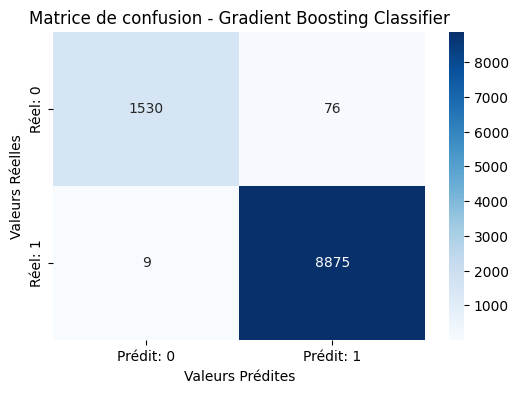

In [ ]:
gbc.fit(X_train, y_train)

# Prédiction
y_pred = gbc.predict(X_test)
# Création de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage avec seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Prédit: 0', 'Prédit: 1'],
            yticklabels=['Réel: 0', 'Réel: 1'])

plt.title("Matrice de confusion - Gradient Boosting Classifier")
plt.ylabel('Valeurs Réelles')
plt.xlabel('Valeurs Prédites')
plt.show()


*Le* modèle fait très peu d’erreurs : seulement 85 erreurs au total sur plus de 10 000 cas.

Le nombre de faux négatifs (9) est extrêmement bas, ce qui est important si rejeter un bon client est coûteux.

Le nombre de faux positifs (76) est un peu plus élevé, mais reste très faible comparé au total.

Le modèle montre un excellent rappel pour la classe 1 (clients solvables) : il détecte presque tous les bons clients.

### Conclusion:


  Le modèle Gradient Boosting Classifier présente d'excellentes performances avec un très faible taux d’erreur. Il est     hautement fiable pour détecter les clients solvables, tout en gardant un bon contrôle sur les faux positifs.
  
Il peut donc être considéré comme un excellent choix de modèle final pour prédire la solvabilité des clients dans ce projet.

In [ ]:
import pickle

# Enregistrer le modèle entraîné
pickle.dump(gbc, open("best_model.pkl", "wb"))


In [ ]:
X.shape

(41960, 25)

In [ ]:
X.columns


Index(['loan_amnt', 'term', 'int_rate', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high'],
      dtype='object')

In [ ]:
!pip -q install streamlit -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 113.6 MB/s eta 0:00:00


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.182.55.39


In [ ]:
%%writefile app.py
import streamlit as st
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

st.title('Credit Loan Solvability Prediction')

st.write("""
Cette application prédit la solvabilité d'un prêt de crédit en se basant sur divers facteurs financiers et personnels.
""")

# Load the trained model and scaler
try:
    with open('best_model.pkl', 'rb') as model_file:
        model = pickle.load(model_file)
    with open('scaler.pkl', 'rb') as scaler_file:
        scaler = pickle.load(scaler_file)
    # Load encoders for categorical features
    with open('encoder_home_ownership.pkl', 'rb') as enc_file:
        encoder_home_ownership = pickle.load(enc_file)
    with open('encoder_sub_grade.pkl', 'rb') as enc_file:
        encoder_sub_grade = pickle.load(enc_file)
    with open('encoder_verification_status.pkl', 'rb') as enc_file:
        encoder_verification_status = pickle.load(enc_file)
    with open('encoder_purpose.pkl', 'rb') as enc_file:
        encoder_purpose = pickle.load(enc_file)


except FileNotFoundError:
    st.error("Modèle ou fichier de mise à l'échelle introuvable. Veuillez vous assurer que 'best_model.pkl', 'scaler.pkl' et les fichiers d'encodeur sont dans le bon répertoire.")
    st.stop()


# 'loan_amnt', 'term', 'int_rate', 'sub_grade', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high'

st.sidebar.header('Fonctionnalités d\'entrée du client')
def user_input_features():
    # Get user input for each feature
    loan_amnt = st.sidebar.slider(
        'Montant du prêt', 0.0, 35000.0, 10000.0,
        help="Somme que l'emprunteur souhaite obtenir."
    )

    term = st.sidebar.selectbox(
        'Durée du prêt (mois)', [36, 60],
        help="Nombre de mois pour rembourser le prêt (36 = 3 ans, 60 = 5 ans)."
    )

    int_rate = st.sidebar.slider(
        'Taux d\'intérêt', 5.0, 25.0, 10.0,
        help="Taux d'intérêt annuel appliqué au prêt."
    )

    sub_grade = st.sidebar.selectbox(
        'Sous-grade', encoder_sub_grade.classes_,
        help="Classe de crédit de l'emprunteur (A1 = meilleur, G5 = plus risqué)."
    )

    home_ownership = st.sidebar.selectbox(
        'Statut du logement', encoder_home_ownership.classes_,
        help="Indique si l'emprunteur est propriétaire, locataire ou autre."
    )

    annual_inc = st.sidebar.slider(
        'Revenu annuel', 0.0, 200000.0, 50000.0,
        help="Revenu annuel déclaré par l'emprunteur."
    )

    verification_status = st.sidebar.selectbox(
        'Vérification du revenu', encoder_verification_status.classes_,
        help="Indique si le revenu a été vérifié ou non."
    )

    purpose = st.sidebar.selectbox(
        'Objectif du prêt', encoder_purpose.classes_,
        help="Raison pour laquelle l'emprunteur demande ce prêt (ex: voiture, études...)."
    )

    dti = st.sidebar.slider(
        'Ratio d’endettement (DTI)', 0.0, 30.0, 15.0,
        help="Part du revenu mensuel déjà utilisée pour rembourser des dettes."
    )

    delinq_2yrs = st.sidebar.slider(
        'Incidents de paiement (2 ans)', 0.0, 5.0, 0.0,
        help="Nombre de retards de paiement (30 jours ou plus) au cours des 2 dernières années."
    )

    fico_range_high = st.sidebar.slider(
        'Score FICO (haut)', 600.0, 850.0, 700.0,
        help="Valeur haute de la fourchette du score de crédit FICO de l’emprunteur."
    )

    inq_last_6mths = st.sidebar.slider(
        'Demandes de crédit (6 mois)', 0.0, 5.0, 1.0,
        help="Nombre de fois où l’emprunteur a demandé un crédit ces 6 derniers mois."
    )

    open_acc = st.sidebar.slider(
        'Comptes de crédit ouverts', 0.0, 30.0, 5.0,
        help="Nombre total de crédits actuellement ouverts."
    )

    pub_rec = st.sidebar.slider(
        'Registres publics négatifs', 0.0, 5.0, 0.0,
        help="Nombre de dossiers publics défavorables (ex: faillite)."
    )

    revol_bal = st.sidebar.slider(
        'Solde revolving', 0.0, 100000.0, 10000.0,
        help="Montant total des dettes de crédit renouvelable (cartes de crédit)."
    )

    revol_util = st.sidebar.slider(
        'Utilisation du crédit revolving (%)', 0.0, 100.0, 50.0,
        help="Pourcentage du crédit revolving utilisé par rapport au disponible."
    )

    total_acc = st.sidebar.slider(
        'Total des comptes de crédit', 0.0, 60.0, 10.0,
        help="Nombre total de comptes de crédit ouverts ou fermés dans le passé."
    )

    total_pymnt = st.sidebar.slider(
        'Paiement total reçu', 0.0, 40000.0, 5000.0,
        help="Somme totale déjà remboursée (principal + intérêts)."
    )

    total_rec_prncp = st.sidebar.slider(
        'Principal déjà payé', 0.0, 35000.0, 4000.0,
        help="Montant du capital déjà remboursé."
    )

    total_rec_int = st.sidebar.slider(
        'Intérêts déjà payés', 0.0, 10000.0, 1000.0,
        help="Montant des intérêts déjà versés."
    )

    total_rec_late_fee = st.sidebar.slider(
        'Frais de retard reçus', 0.0, 100.0, 0.0,
        help="Montant des frais payés pour retard de paiement."
    )

    recoveries = st.sidebar.slider(
        'Montant recouvré', 0.0, 1000.0, 0.0,
        help="Montant récupéré après un défaut de paiement."
    )

    collection_recovery_fee = st.sidebar.slider(
        'Frais de recouvrement', 0.0, 100.0, 0.0,
        help="Frais associés aux procédures de recouvrement."
    )

    last_pymnt_amnt = st.sidebar.slider(
        'Dernier paiement', 0.0, 20000.0, 500.0,
        help="Montant du dernier paiement effectué."
    )

    last_fico_range_high = st.sidebar.slider(
        'Dernier score FICO (haut)', 600.0, 850.0, 700.0,
        help="Valeur haute de la dernière fourchette FICO de l’emprunteur."
    )

    # Encode categorical features using the loaded encoders
    sub_grade_encoded = encoder_sub_grade.transform([sub_grade])[0]
    home_ownership_encoded = encoder_home_ownership.transform([home_ownership])[0]
    verification_status_encoded = encoder_verification_status.transform([verification_status])[0]
    purpose_encoded = encoder_purpose.transform([purpose])[0]

    data = {'loan_amnt': loan_amnt,
            'term': term,
            'int_rate': int_rate,
            'sub_grade': sub_grade_encoded,
            'home_ownership': home_ownership_encoded,
            'annual_inc': annual_inc,
            'verification_status': verification_status_encoded,
            'purpose': purpose_encoded,
            'dti': dti,
            'delinq_2yrs': delinq_2yrs,
            'fico_range_high': fico_range_high,
            'inq_last_6mths': inq_last_6mths,
            'open_acc': open_acc,
            'pub_rec': pub_rec,
            'revol_bal': revol_bal,
            'revol_util': revol_util,
            'total_acc': total_acc,
            'total_pymnt': total_pymnt,
            'total_rec_prncp': total_rec_prncp,
            'total_rec_int': total_rec_int,
            'total_rec_late_fee': total_rec_late_fee,
            'recoveries': recoveries,
            'collection_recovery_fee': collection_recovery_fee,
            'last_pymnt_amnt': last_pymnt_amnt,
            'last_fico_range_high': last_fico_range_high
            }
    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()
# Add a predict button
if st.sidebar.button('Prédire'):
    # Scale the input features
    input_scaled = scaler.transform(input_df)

    # Make prediction
    prediction = model.predict(input_scaled)
    prediction_proba = model.predict_proba(input_scaled)[0]

    # Mapping classes -> libellé/couleur
    # Assumption: model.classes_ = [0, 1]  where 0 = Refus de crédit, 1 = Octroi de crédit
    label_map = {0: ("Refus de crédit", "#d32f2f"), 1: ("Octroi de crédit", "#2e7d32")}
    pred_class = int(prediction[0])
    pred_label, pred_color = label_map.get(pred_class, ("Inconnu", "#455a64"))

    # Confiance (probabilité de la classe prédite)
    # On récupère l'index de la classe prédite dans model.classes_
    class_index = list(model.classes_).index(pred_class)
    confidence = float(prediction_proba[class_index])  # entre 0 et 1

    # --- STYLE & BADGE ---
    st.markdown(
        f"""
        <style>
        .status-card {{
            border-radius: 14px;
            padding: 18px 20px;
            background: {pred_color}20;
            border: 1px solid {pred_color}55;
        }}
        .status-title {{
            font-size: 20px;
            font-weight: 700;
            margin: 0 0 6px 0;
            color: {pred_color};
        }}
        .status-sub {{
            font-size: 14px;
            color: #444;
            margin: 0;
        }}
        .pill {{
            display: inline-block;
            padding: 6px 10px;
            border-radius: 999px;
            background: {pred_color};
            color: white;
            font-weight: 700;
            margin-right: 8px;
        }}
        </style>
        <div class="status-card">
          <div class="status-title">Résultat de la prédiction</div>
          <p class="status-sub">
            Statut : <span class="pill">{pred_label}</span>
            Confiance : <b>{confidence*100:.1f}%</b>
          </p>
        </div>
        """,
        unsafe_allow_html=True
    )

    # Barre de confiance
    st.write("### Confiance du modèle")
    st.progress(min(max(int(confidence * 100), 0), 100))

    # Détail des probabilités par classe
    st.write("### Probabilités par classe")
    proba_df = pd.DataFrame({
        "Classe": [label_map[c][0] if c in label_map else str(c) for c in model.classes_],
        "Probabilité": [f"{p*100:.2f}%" for p in prediction_proba]
    })
    st.dataframe(proba_df, use_container_width=True)

    # Affichage des entrées utilisateur
    with st.expander("Voir les paramètres saisis"):
        st.dataframe(input_df, use_container_width=True)


Writing app.py


In [ ]:
!pip -q install streamlit

# Nettoyage d’anciens processus si besoin
!pkill streamlit || true

# Chemin du script
APP_PATH = "app.py"

# Lance Streamlit
!streamlit run "$APP_PATH" --server.port 8501 --server.address 0.0.0.0 \
  --server.enableCORS false --server.enableXsrfProtection false >/dev/null 2>&1 &


In [ ]:
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64 -O cloudflared
!chmod +x cloudflared
!./cloudflared tunnel --url http://localhost:8501 --no-autoupdate

2025-09-18T18:22:26Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2025-09-18T18:22:26Z INF Requesting new quick Tunnel on trycloudflare.com...
2025-09-18T18:22:30Z INF +--------------------------------------------------------------------------------------------+
2025-09-18T18:22:30Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2025-09-18T18:22:30Z INF |  https://whenever-involved-covered-salem.trycloudflare